In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
from pandas.io.json import json_normalize
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# 데이터 전처리

In [2]:
lol_df = pd.read_csv('./CL15.csv', encoding='CP949')

# 승패 변환
wl_mapping = {True:1,False:0}
lol_df['blueWins'] = lol_df['blueWins'].map(wl_mapping)
lol_df['redWins'] = lol_df['redWins'].map(wl_mapping)


# dragon_type 변환
dragontype = ['WATER_DRAGON', 'FIRE_DRAGON', 'AIR_DRAGON', 'EARTH_DRAGON', 'CHEMTECH_DRAGON',  'HEXTECH_DRAGON']
n_dragontype = 6

for i in dragontype:    # 리스트형태 없애기
  lol_df = lol_df.replace(f"['{i}']", i)

bDT = lol_df['blueDragonType'].tolist()   # ','를 기준으로 데이터값 구분하기(리스트로 변환)
rDT = lol_df['redDragonType'].tolist()
for i in range(len(bDT)):
  try:
    bDT[i] = bDT[i].split(',')
  except:
    bDT[i] = 'NO_DRAGON'
for i in range(len(rDT)):
  try:
    rDT[i] = rDT[i].split(',')
  except:
    rDT[i] = 'NO_DRAGON'

one_hot_mat = list()    # 리스트 원핫인코딩 후 다시 데이터프레임에 집어넣기(blue)
for _ in range(len(bDT)):
  one_hot_vec = list()
  for _ in range(n_dragontype):
    one_hot_vec.append(0)
  one_hot_mat.append(one_hot_vec)

for bDT_idx, bDTs in enumerate(bDT):
  one_hot_vec = one_hot_mat[bDT_idx]
  for i in bDTs:
    if i == 'WATER_DRAGON' : one_hot_vec[0] =1
    elif i == 'FIRE_DRAGON': one_hot_vec[1] = 1
    elif i == 'AIR_DRAGON': one_hot_vec[2] = 1
    elif i == 'EARTH_DRAGON' : one_hot_vec[3] = 1
    elif i == 'CHEMTECH_DRAGON' : one_hot_vec[4] = 1
    elif i == 'HEXTECH_DRAGON' : one_hot_vec[5] = 1
dragon_df = np.array(one_hot_mat)
dragon_df = pd.DataFrame(dragon_df, columns = [f'blue{i}' for i in dragontype])
lol_df = pd.concat([lol_df,dragon_df],axis=1)

one_hot_mat = list()    # (red)
for _ in range(len(bDT)):
  one_hot_vec = list()
  for _ in range(n_dragontype):
    one_hot_vec.append(0)
  one_hot_mat.append(one_hot_vec)

for rDT_idx, rDTs in enumerate(rDT):
  one_hot_vec = one_hot_mat[rDT_idx]
  for i in rDTs:
    if i == 'WATER_DRAGON' : one_hot_vec[0] =1
    elif i == 'FIRE_DRAGON': one_hot_vec[1] = 1
    elif i == 'AIR_DRAGON': one_hot_vec[2] = 1
    elif i == 'EARTH_DRAGON' : one_hot_vec[3] = 1
    elif i == 'CHEMTECH_DRAGON' : one_hot_vec[4] = 1
    elif i == 'HEXTECH_DRAGON' : one_hot_vec[5] = 1
dragon_df = np.array(one_hot_mat)
dragon_df = pd.DataFrame(dragon_df, columns = [f'red{i}' for i in dragontype])
lol_df = pd.concat([lol_df,dragon_df],axis=1)

lol_df.filter(like='DRAGON', axis=1)

FileNotFoundError: [Errno 2] No such file or directory: './CL15.csv'

In [ ]:
lol_df.head(10)

,Unnamed: 0,gameId,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueTotalDamageToChampion,...,blueAIR_DRAGON,blueEARTH_DRAGON,blueCHEMTECH_DRAGON,blueHEXTECH_DRAGON,redWATER_DRAGON,redFIRE_DRAGON,redAIR_DRAGON,redEARTH_DRAGON,redCHEMTECH_DRAGON,redHEXTECH_DRAGON
0,0,KR_6419756778,1,23844,4504,38,9.50,338,80,22447,...,1,0,0,0,0,0,0,0,0,0
1,0,KR_6415275424,1,23999,5204,37,9.25,306,82,32867,...,0,0,1,0,0,0,0,0,0,0
2,0,KR_6423763038,1,19896,1756,36,9.00,344,83,23703,...,0,0,0,0,0,0,0,0,0,1
3,0,KR_6416730851,0,19214,3964,35,8.75,292,72,19422,...,0,0,0,0,0,0,0,0,0,1
4,0,KR_6421561510,0,23906,3216,37,9.25,353,52,24677,...,0,1,0,0,0,0,0,0,0,0
5,0,KR_6416492046,1,23660,2765,37,9.25,341,76,33410,...,1,0,1,0,0,0,0,0,0,0
6,0,KR_6422949089,0,17444,2634,33,8.25,299,80,20478,...,0,0,0,0,0,0,0,1,1,0
7,0,KR_6422970549,0,20384,2499,36,9.00,302,62,21368,...,0,0,0,0,0,1,0,0,0,0
8,0,KR_6416156445,0,22813,2558,37,9.25,335,70,24875,...,0,0,1,0,0,1,0,0,0,0
9,0,KR_6418358236,1,25205,2470,37,9.25,300,84,28329,...,0,0,1,0,0,0,1,0,0,0


# 데이터EDA

In [3]:
lol_df.columns

NameError: name 'lol_df' is not defined

In [4]:
def first_valid_visualize(df,target,variable):

    sns.catplot(x=target, y=variable, kind='point', data=df)
    plt.title(variable+'WinRate')
    #plt.xticks(df[target])
    return plt.show()

In [5]:
first_valid_visualize(lol_df,'blueWins','blueFirstBlood')
first_valid_visualize(lol_df,'blueWins','blueFirstTower')
first_valid_visualize(lol_df,'blueWins','blueFirstDragon')

NameError: name 'lol_df' is not defined

In [37]:
lol_df.select_dtypes(['int64','float64']).corr()[['blueWins']]

,blueWins
Unnamed: 0,NaN
blueWins,1.000000
blueTotalGolds,0.540687
blueCurrentGolds,0.208047
blueTotalLevel,0.405035
...,...
redFIRE_DRAGON,-0.146036
redAIR_DRAGON,-0.099824
redEARTH_DRAGON,-0.130259
redCHEMTECH_DRAGON,-0.064527


In [38]:
lol_df1 = lol_df.drop(columns=['Unnamed: 0','gameId','blueCurrentGolds','blueTotalLevel','blueFirstTowerLane','blueDragonType','redCurrentGolds','redTotalLevel','redFirstTowerLane','redDragonType','redWins'])

In [39]:
lol_df1

,blueWins,blueTotalGolds,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueTotalDamageToChampion,blueFirstBlood,blueKill,blueDeath,blueAssist,...,blueAIR_DRAGON,blueEARTH_DRAGON,blueCHEMTECH_DRAGON,blueHEXTECH_DRAGON,redWATER_DRAGON,redFIRE_DRAGON,redAIR_DRAGON,redEARTH_DRAGON,redCHEMTECH_DRAGON,redHEXTECH_DRAGON
0,1,23844,9.50,338,80,22447,1,13,12,21,...,1,0,0,0,0,0,0,0,0,0
1,1,23999,9.25,306,82,32867,0,18,11,22,...,0,0,1,0,0,0,0,0,0,0
2,1,19896,9.00,344,83,23703,1,6,12,13,...,0,0,0,0,0,0,0,0,0,1
3,0,19214,8.75,292,72,19422,1,5,10,8,...,0,0,0,0,0,0,0,0,0,1
4,0,23906,9.25,353,52,24677,1,19,9,24,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,1,26894,10.00,373,102,26216,1,14,10,12,...,0,0,0,1,1,0,0,0,0,0
1517,0,22672,9.00,309,67,26064,1,16,14,17,...,0,0,0,1,0,0,0,0,1,0
1518,1,26975,9.25,312,60,34028,1,21,9,31,...,0,0,1,0,0,0,0,0,0,1
1519,1,25905,9.75,365,95,27497,1,17,4,22,...,0,0,1,0,0,0,0,0,0,0


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [41]:
def train_test(df):
  x_train = df.drop(['blueWins'], axis=1)
  y_train = df['blueWins']
  return x_train, y_train

In [42]:
x_train, y_train = train_test(lol_df1)

val_size = 0.2

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=val_size, random_state=42)

## LGBM 모델 적용

In [43]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree

In [45]:
model = LGBMClassifier()
model.fit(x_train, y_train)
valid_pred = model.predict(x_valid)
accuracy = accuracy_score(y_valid, valid_pred)
print("Accuracy: ", accuracy*100)

Accuracy:  75.73770491803279


# 베이지안 optimization

In [46]:
pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
from bayes_opt import BayesianOptimization

In [48]:
# 탐색 대상 함수 (XGBRegressor)
def LGBM_cv(max_depth,learning_rate, n_estimators,
            min_child_weight, subsample
            ,colsample_bytree, silent=True):

    # 모델 정의
    model = LGBMClassifier(max_depth=int(max_depth),
                            learning_rate=learning_rate,
                            n_estimators=int(n_estimators),
                            min_child_weight=min_child_weight,
                            subsample=subsample,
                            colsample_bytree=colsample_bytree
                            )
    # 모델 훈련
    model.fit(x_train, y_train)

    # 예측값 출력
    y_pred= model.predict(x_valid)

    return f1_score(y_valid, y_pred)

In [49]:
pbounds = {'max_depth': (3, 7),
                'learning_rate': (0.01, 0.3),
                'n_estimators': (20,100),
                'min_child_weight': (0, 3),
                'subsample': (0.5, 1),
                'colsample_bytree' :(0.2, 1)
                }

lm_bo=BayesianOptimization(f=LGBM_cv, pbounds=pbounds, verbose=2, random_state=1 )    

lm_bo.maximize(init_points=2, n_iter=100)

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
| 1         | 0.7546    | 0.5336    | 0.2189    | 3.0       | 0.907     | 31.74     | 0.5462    |
| 2         | 0.763     | 0.349     | 0.1102    | 4.587     | 1.616     | 53.54     | 0.8426    |
| 3         | 0.7454    | 0.9675    | 0.2653    | 4.732     | 2.254     | 52.61     | 0.6723    |
| 4         | 0.7704    | 0.6782    | 0.1023    | 5.652     | 1.345     | 33.78     | 0.6515    |
| 5         | 0.7341    | 0.4603    | 0.2457    | 4.772     | 1.633     | 53.27     | 0.9138    |
| 6         | 0.7528    | 0.5276    | 0.04547   | 5.92      | 2.604     | 73.03     | 0.6975    |
| 7         | 0.73      | 0.9334    | 0.03744   | 6.947     | 2.841     | 21.07     | 0.727     |
| 8         | 0.7299    | 0.7552    | 0.1763    | 4.316     | 2.129     | 83.79     | 0.5152    |
| 9         | 0.7675

In [50]:
print(lm_bo.max['params'])

{'colsample_bytree': 0.2471782237169994, 'learning_rate': 0.1479768945366217, 'max_depth': 3.4133206119874533, 'min_child_weight': 0.34655810805870224, 'n_estimators': 88.13852323845724, 'subsample': 0.721248184307204}


In [51]:
param = {'colsample_bytree': 0.2471782237169994, 'learning_rate': 0.1479768945366217, 'max_depth': 4, 'min_child_weight': 0.34655810805870224, 
         'n_estimators': 88, 'subsample': 0.721248184307204}
model = LGBMClassifier(**param)
model.fit(x_train, y_train)
valid_pred = model.predict(x_valid)
accuracy = accuracy_score(y_valid, valid_pred)
print("Accuracy: ", accuracy*100)

Accuracy:  80.98360655737706


[Text(0.5, 1.0, 'Feature Importance (gain)'),
 Text(0.5, 0, 'Feature Importance'),
 Text(0, 0.5, 'Features')]

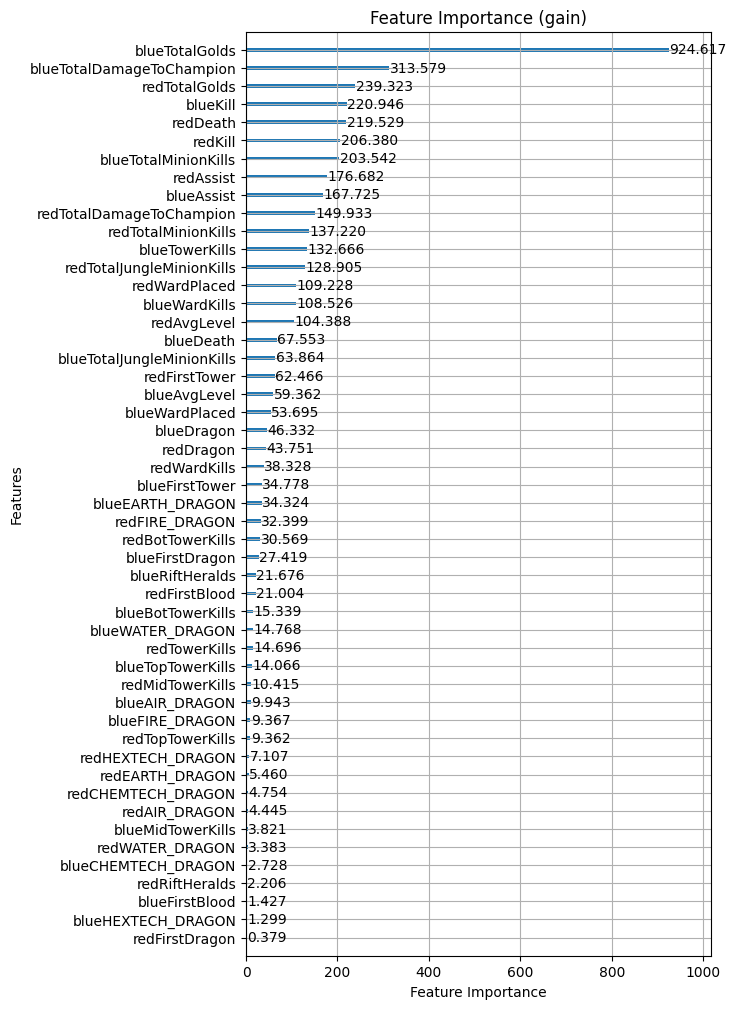

In [52]:
# GAIN
feature_columns = list(lol_df1.columns.difference(["blueWins"]))
ax = plot_importance(model, max_num_features=len(feature_columns), importance_type='gain', figsize=(6,12))
ax.set(title=f'Feature Importance (gain)',
   xlabel='Feature Importance',
   ylabel='Features')

<Axes: >

<Figure size 2000x600 with 0 Axes>

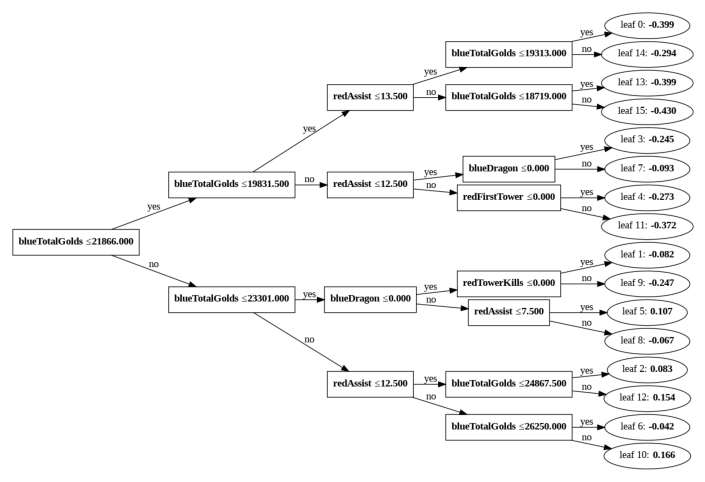

In [54]:
plt.figure(figsize=(20,6))
plot_tree(model, figsize = (20,6))